imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

----
Pega os nomes dos arquivos:

In [2]:
diretorio_atual = os.getcwd()
nome_da_pasta = "data" 
diretorio = os.path.join(diretorio_atual, nome_da_pasta)

def listar_nomes_arquivos(diretorio):
    nomes_arquivos = []
    if os.path.exists(diretorio) and os.path.isdir(diretorio):
        for nome_arquivo in os.listdir(diretorio):
            caminho_completo = os.path.join(diretorio, nome_arquivo)
            if os.path.isfile(caminho_completo):
                nomes_arquivos.append(nome_arquivo)
    else:
        print("O diretório não existe ou não é uma pasta válida.")
    return nomes_arquivos

nomes_arquivos = listar_nomes_arquivos(diretorio)

----
Faz a Leitura dos arquivos:

In [ ]:
def ler_arquivos(nomes_arquivos):
    codificacao_correta = 'latin-1'
    data_frames = []  
    for arquivo in nomes_arquivos:
        data_frame = pd.read_csv('./data/' + arquivo, encoding=codificacao_correta, delimiter=';', skiprows=3, error_bad_lines=False, warn_bad_lines=False)
        data_frames.append(data_frame)

    return data_frames

data_frames = ler_arquivos(nomes_arquivos)

----
Adicionando uma coluna com o ano

In [4]:
def adicionar_ano_em_coluna(data_frames, nomes_arquivos):
    for i, data_frame in enumerate(data_frames):
        nome_arquivo = nomes_arquivos[i]
        ano = nome_arquivo.split('_')[1]  
        ano = os.path.splitext(ano)[0]  
        data_frame['Ano'] = ano 
    
adicionar_ano_em_coluna(data_frames, nomes_arquivos)

----
Concatenando dataFrames para unificar eles

In [5]:
def concatenar_dataframes(dataframes_list):

    if len(dataframes_list) == 0:
        raise ValueError("A lista de DataFrames está vazia.")
    
    data_frame_concatenado = pd.concat(dataframes_list, ignore_index=True)
    return data_frame_concatenado

data_frame_concatenado = concatenar_dataframes(data_frames)

----
Salvando salvando a informação em um CSV

In [6]:

def salvar_dataframe_csv(dataframe, nome_arquivo, encoding='latin-1'):
    dataframe.to_csv(nome_arquivo, sep=',', decimal=',', float_format='%.2f', encoding=encoding, index=False)

nome_arquivo_saida = 'dados_consolidados.csv'
salvar_dataframe_csv(data_frame_concatenado, nome_arquivo_saida, encoding='latin-1')

-----
Cria grafico mostrando a evolução dos valores anuais. 

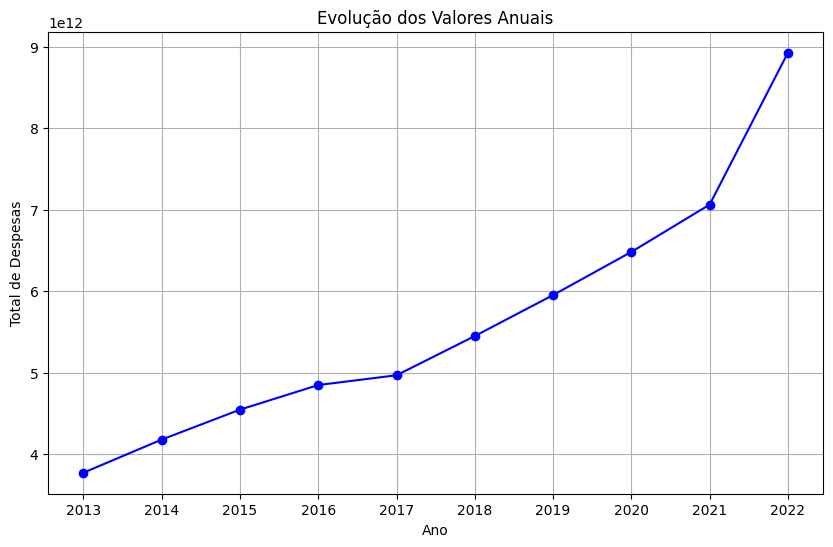

In [7]:
def gerar_grafico_evolucao_valores_por_ano(dataframe):
    # Agrupar os valores por ano e calcular a soma das despesas em cada ano
    dados_anuais = dataframe.groupby('Ano')['Valor'].sum()

    # Criar o gráfico de linha
    plt.figure(figsize=(10, 6))
    plt.plot(dados_anuais.index, dados_anuais.values, marker='o', color='b')
    plt.xlabel('Ano')
    plt.ylabel('Total de Despesas')
    plt.title('Evolução dos Valores Anuais')
    plt.grid(True)
    plt.xticks(dados_anuais.index)
    plt.show()

arquivo_entrada = 'dados_consolidados.csv'
df = pd.read_csv(arquivo_entrada, encoding='latin-1', thousands='.', decimal=',')

gerar_grafico_evolucao_valores_por_ano(df)